In [6]:
import mmcv, cv2
from mmcv.image import cutout
import matplotlib.pyplot as plt
import numpy as np

from mmpose.datasets.transforms import LoadImage, TopdownAffine, HandRandomFlip, Albumentation
from mmpose.datasets.transforms.common_transforms import RandomFlip, RandomHalfBody

# Load the original image from the path
results = dict(
  img_path=r'D:\Document\End_project_2023\hrnet\Lite-HRNet\data\coco\val2017\0a5678ee-fashionable-woman-white-jumpsuit-light-background-stylish-clothes-emo_4tJBAt6.jpg',
  )

load_img = LoadImage()
results = load_img(results)
img = cv2.cvtColor(results['img'], cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

AssertionError: MMCV==1.6.0 is used but incompatible. Please install mmcv>=2.0.0rc4, <=3.0.0.

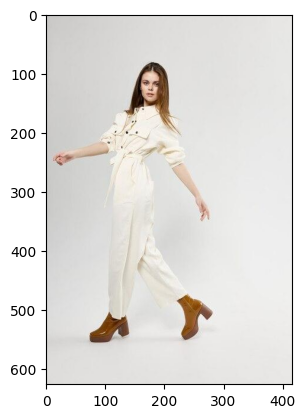

In [58]:
import cv2
from mmpose.datasets.transforms import LoadImage, RandomFlip, Albumentation, GetBBoxCenterScale, RandomHalfBody, BottomupRandomAffine
from mmcv.image import cutout
import matplotlib.pyplot as plt
import numpy as np

# Load the original image from the path
results = dict(
  img_path=r'D:\Document\End_project_2023\hrnet\Lite-HRNet\data\coco\val2017\0a5678ee-fashionable-woman-white-jumpsuit-light-background-stylish-clothes-emo_4tJBAt6.jpg',
  bbox = np.array([123,256,341,322]),
  keypoints_visible = np.array([5]),
  upper_body_ids = 2,
  lower_body_ids = 1
  )
load_img = LoadImage()
gg = GetBBoxCenterScale()
rd = RandomHalfBody()
results = load_img(results)
results = gg(results)
results = rd(results)
# img = cv2.cvtColor(results['img'], cv2.COLOR_RGB2BGR)
# # print(img.shape)
# print(results["bbox_center"])


plt.imshow(img)
plt.show()

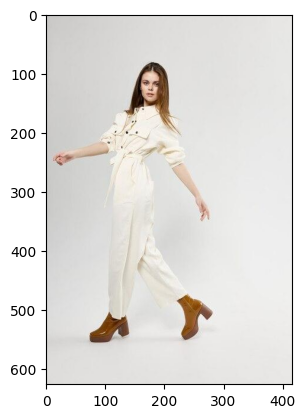

In [42]:
import cv2
from mmpose.datasets.transforms import LoadImage, RandomFlip, Albumentation, GetBBoxCenterScale
from mmcv.image import cutout
import matplotlib.pyplot as plt





# Load the original image from the path
results = dict(
  img_path=r'D:\Document\End_project_2023\hrnet\Lite-HRNet\data\coco\val2017\0a5678ee-fashionable-woman-white-jumpsuit-light-background-stylish-clothes-emo_4tJBAt6.jpg',
  )
load_img = LoadImage()
results = load_img(results)


# Perform diagonal flip transformation on the original image
horizontal = RandomFlip(prob=.5, direction='horizontal')
Vertical = RandomFlip(prob=.1, direction='vertical')

custom = Albumentation(transforms=[
                    dict(
                        type='RandomBrightnessContrast',
                        brightness_limit=[0.1, 0.3],
                        contrast_limit=[0.1, 0.3],
                        p=0.2),
                    dict(type='ChannelShuffle', p=0.1),
                    dict(
                        type='OneOf',
                        transforms=[
                            dict(type='Blur', blur_limit=3, p=1.0),
                            dict(type='MedianBlur', blur_limit=3, p=1.0)
                        ],
                        p=0.1),
                ])

results = horizontal(results)
results= Vertical(results)

results= custom(results)
# Get the image after flipping and transformation
# Albumentation()
# num_holes = np.random.randint(5,10)
# hole_size = np.random.randint(4,6) *5
# image_height, image_width, _ = augmented_image.shape
# holes = []
# for _ in range(num_holes):
#     x = np.random.randint(0, image_width - hole_size)
#     y = np.random.randint(0, image_height - hole_size)
#     holes.append([x, y, x + hole_size, y + hole_size])
# fill_value = np.random.randint(0, 256)
# result = Albumentation.cutout(augmented_image, holes, fill_value=fill_value)

img = cv2.cvtColor(results['img'], cv2.COLOR_RGB2BGR)
plt.imshow(img)
plt.show()

In [40]:
import cv2
from mmpose.datasets.transforms import LoadImage, RandomFlip, Albumentation
from mmcv.image import cutout
import matplotlib.pyplot as plt
# from mmpose.structures.keypoint.transforms import flip_keypoints, flip_keypoints_custom_center, keypoint_clip_border


from mmpose.structures.keypoint.transforms import flip_keypoints

import numpy as np

from mmpose.structures.keypoint.transforms import flip_keypoints
import numpy as np

# Tạo một mảng numpy 2D chứa các keypoints
keypoints = np.array([[50, 50], [25, 25], [10, 10]])  # (3, 2)

# Số chiều của keypoints_visible là 1
keypoints_visible = np.array([[2], [2], [2]])  # (3, 1)

# Kích thước hình ảnh
image_size = [100, 200]

# Chỉ số của các keypoints tương ứng khi lật theo chiều ngang
flip_indices = [0,1,2]

# Hướng lật là theo chiều ngang
direction = 'horizontal'

# Lật ngược keypoints
flipped_keypoints = flip_keypoints(keypoints=keypoints, keypoints_visible=keypoints_visible, image_size=image_size, flip_indices=flip_indices, direction=direction)

print("Keypoints ban đầu:")
print(keypoints)

print("Mức độ hiển thị của keypoints:")
print(keypoints_visible)

print("Kích thước của hình ảnh:")
print(image_size)

print("Chỉ số của keypoints tương ứng khi lật:")
print(flip_indices)

print("Kết quả sau khi lật ngược keypoints:")
print(flipped_keypoints)

Keypoints ban đầu:
[[50 50]
 [25 25]
 [10 10]]
Mức độ hiển thị của keypoints:
[[2]
 [2]
 [2]]
Kích thước của hình ảnh:
[100, 200]
Chỉ số của keypoints tương ứng khi lật:
[0, 1, 2]
Kết quả sau khi lật ngược keypoints:
(array([[49, 50],
       [74, 25],
       [89, 10]]), array([[2],
       [2],
       [2]]))


In [ ]:
from mmpose.datasets import KeypointConverter
import numpy as np

# Tạo một instance của KeyPointTransform
transform = KeypointConverter(
    num_joints=17,
    , 
    joint_pairs=[[0, 1], [1, 2], ...],  # Các cặp keypoint để kết nối
    transforms=[...],  # Các phép biến đổi khác như resize, flip, augmentations
    heatmap_size=(64, 64),  # Kích thước heatmap
    sigma=2,  # Độ rộng của gaussian kernel khi tạo heatmap
    use_different_joints_weight=True,  # Sử dụng trọng số khác nhau cho từng keypoint
    use_different_scales=False  # Sử dụng tỷ lệ khác nhau cho từng keypoint
)

# Xử lý dữ liệu đầu vào
data = {
    'image': np.random.randn(256, 256, 3),  # Ảnh đầu vào
    'keypoints': np.random.randn(17, 3)  # Key points (17 keypoints, mỗi keypoint có 3 giá trị: x, y, s)
}

data = transform(data)  # Áp dụng transformation cho dữ liệu

# Dữ liệu sau khi xử lý
transformed_image = data['image']
transformed_keypoints = data['keypoints']

In [2]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--oks', default=0.95, required=False)
opt = parser.parse_args()
config_path = opt.config
print(config_path)
        


usage: ipykernel_launcher.py [-h] [--oks OKS]
ipykernel_launcher.py: error: unrecognized arguments: --f=c:\Users\User\AppData\Roaming\jupyter\runtime\kernel-v3afc6ef55f45aee258bf11368f97ba6c2251ead29.json


SystemExit: 2

c:\Users\User\anaconda3\envs\hrnet\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
